In [147]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import math
import numpy as np

### User Manual
##### General
Once all 8 days are collected, the surface reflectance algorithm applies a set of filters based on quality, cloud, and viewing geometry.
* CloudReplaced with data 8 contaminated pixelsand extreme off-nadirsensor viewsare considered lower quality.
* A cloudfree, nadir view pixel with no residual atmospheric contamination represents the best quality pixel.

Only the higher quality cloud free data are retained forfurther compositing. Additionally, they filter pixels affected by atmospheric contaminants.


In [207]:
def get_detaildQA(number):
    # Classification MODIS
    tpl_QA = ('goodQA', 'regularQA','cloudy','unmade')
    tpl_QA_usefulness = ('highest', 'lower', 'decreasing1', 'decreasing2','decreasing3','decreasing4','decreasing5','decreasing6','decreasing7','decreasing8','decreasing9','decreasing10','lowest','useless','faultyL1B','unuseful')
    tpl_QA_aerosol = ('correction','low','intermediate','high')
    tpl_QA_adjacent_cloud = ('no','yes')
    tpl_QA_water = ('shallow ocean','land','shorelines', 'shallow inland water','ephimeral water', 'shallow inland water','ocean', 'ocean')
    tpl_QA_snow = ('no','yes')
    
    QA_general = tpl_QA[0B11 & number]
    QA_usefulness = tpl_QA_usefulness[0B1111 & (number >> 2)]
    QA_aerosol = tpl_QA_aerosol[0B11 & (number >> 6)]
    QA_adjacent_cloud = tpl_QA_adjacent_cloud[0B1 & (number >> 8)]
    QA_water =  tpl_QA_water[0B111 & (number >> 11)]
    QA_snow = tpl_QA_snow[0B1 & (number >> 14)]
    return {'QA_general': QA_general, 'QA_usefulness': QA_usefulness, 'QA_aerosol': QA_aerosol, 'QA_adjacent_cloud': QA_adjacent_cloud, 'QA_water':QA_water, 'QA_snow': QA_snow}

After verifying all of the files, none of them showed presence of snow or ice. Hence, that column was eliminated.

In [210]:
for file in os.listdir('../ndvi_data/earth_engine_export/'):

    df_original = pd.read_csv('../ndvi_data/earth_engine_export/'+file)

    df_original['.geo'] = df_original['.geo'].apply(json.loads)
    df_original['longitude'] = [row[1]['.geo']['coordinates'][0] for row in df_original.iterrows()]
    df_original['latitud'] = [row[1]['.geo']['coordinates'][1] for row in df_original.iterrows()]
    df_original[['QA_general','QA_usefulness','QA_aerosol','QA_adjacent_cloud','QA_water','QA_snow']] = None

    for index, value in enumerate([get_detaildQA(row[1]['DetailedQA']) for row in df_original.iterrows()]):
        df_original.loc[index,['QA_general','QA_usefulness','QA_aerosol','QA_adjacent_cloud','QA_water','QA_snow']] = value

    #df_modified['DetailedQA'] = df_modified['DetailedQA'].apply(bin)
    df_original = df_original.drop(columns = ['.geo','DetailedQA','QA_snow'])
    df_original.to_csv('../ndvi_data/new_columns_data/'+file, index=False)

    #df_modified.head()
print('done')

done


### Exploratory analysis

In [108]:
df_all_data_ts = pd.read_csv('../ndvi_data/new_columns_data/2010-01-01.csv')[['longitude','latitud','NDVI']] * 1000 + 0.5
df_all_data_ts['NDVI'] = df_all_data_ts['NDVI'] * 10
df_all_data_ts = df_all_data_ts.map(math.ceil) / 1000
df_all_data_ts['NDVI'] = df_all_data_ts['NDVI'] / 10
#136

for file in os.listdir('../ndvi_data/new_columns_data/')[1:21]:
    df_modified = pd.read_csv('../ndvi_data/new_columns_data/'+file)[['longitude','latitud','NDVI']] * 1000 + 0.5
    df_modified['NDVI'] = df_modified['NDVI'] * 10
    df_modified = df_modified.map(math.ceil) / 1000
    df_modified['NDVI'] = df_modified['NDVI'] / 10
    df_all_data_ts = pd.merge(df_all_data_ts,df_modified, on = ['longitude','latitud'], how = 'inner',suffixes=('', '_'+file[:-4]))
df_all_data_ts

,longitude,latitud,NDVI,NDVI_2010-01-17,NDVI_2010-02-02,NDVI_2010-02-18,NDVI_2010-03-06,NDVI_2010-03-22,NDVI_2010-04-07,NDVI_2010-04-23,...,NDVI_2010-06-26,NDVI_2010-07-12,NDVI_2010-07-28,NDVI_2010-08-13,NDVI_2010-08-29,NDVI_2010-09-14,NDVI_2010-09-30,NDVI_2010-10-16,NDVI_2010-11-01,NDVI_2010-11-17
0,-36.534,-6.842,0.4656,0.6444,0.6946,0.5594,0.4870,0.6441,0.6866,0.5434,...,0.4947,0.4150,0.3770,0.3452,0.3155,0.3223,0.2906,0.2860,0.5028,0.4914
1,-36.525,-6.842,0.4684,0.6592,0.5035,0.5686,0.4736,0.6432,0.5899,0.4972,...,0.4999,0.3853,0.3633,0.3257,0.2925,0.3336,0.2741,0.2801,0.5165,0.5436
2,-36.489,-6.842,0.5110,0.5245,0.5116,0.4783,0.4177,0.6470,0.4679,0.4417,...,0.5622,0.4713,0.4085,0.3385,0.2908,0.2901,0.2677,0.2603,0.5151,0.4711
3,-36.526,-6.851,0.4605,0.6224,0.3674,0.5209,0.4488,0.4693,0.5884,0.4661,...,0.4788,0.3803,0.3648,0.3292,0.2800,0.3038,0.2650,0.2625,0.5086,0.5189
4,-36.517,-6.851,0.4427,0.5874,0.7076,0.5409,0.4579,0.6065,0.5537,0.4658,...,0.4763,0.4032,0.3588,0.3312,0.2974,0.3257,0.2918,0.2630,0.4995,0.5292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,-36.428,-6.986,0.3825,0.5815,0.5187,0.4351,0.3702,0.5862,0.6799,0.5963,...,0.6075,0.5491,0.4810,0.4379,0.3850,0.3538,0.3248,0.2938,0.4175,0.4962
213,-36.419,-6.986,0.3629,0.3550,0.4324,0.4083,0.3972,0.5162,0.7156,0.6180,...,0.6501,0.5555,0.4850,0.4544,0.3071,0.3260,0.3110,0.2840,0.4228,0.3897
214,-36.410,-6.986,0.2338,0.4447,0.5300,0.4642,0.3943,0.4832,0.6725,0.6860,...,0.6757,0.5869,0.5194,0.4208,0.3078,0.3240,0.2891,0.2881,0.4012,0.4487
215,-36.456,-6.995,0.5147,0.7725,0.5384,0.5488,0.4530,0.6264,0.5990,0.6561,...,0.6461,0.5660,0.5214,0.4786,0.3907,0.3525,0.3043,0.2933,0.4891,0.4477


In [100]:
len(os.listdir('../ndvi_data/new_columns_data/'))

138

In [58]:
a = pd.read_csv('../ndvi_data/new_columns_data/2010-01-01.csv')[['longitude','latitud','NDVI']]
b = pd.read_csv('../ndvi_data/new_columns_data/2010-01-17.csv')[['longitude','latitud','NDVI']]
#pd.merge(a,b, on = ['longitude','latitud'], how = 'inner',suffixes=('', '_2010-01-01'))
a.map(lambda number: float(f"{number:.2f}") )

,longitude,latitud,NDVI
0,-36.54,-6.84,0.47
1,-36.53,-6.84,0.47
2,-36.49,-6.84,0.51
3,-36.53,-6.85,0.46
4,-36.52,-6.85,0.44
...,...,...,...
222,-36.42,-6.99,0.36
223,-36.41,-6.99,0.23
224,-36.40,-6.99,0.37
225,-36.46,-7.00,0.51


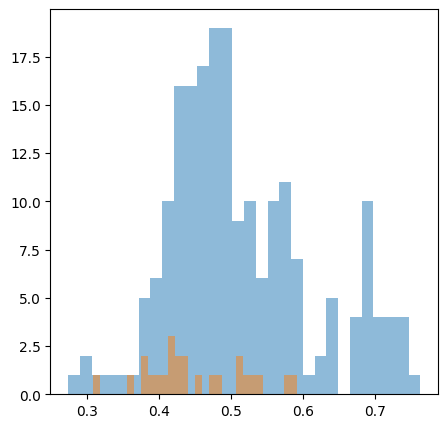

In [138]:
df_all_data_ts = pd.read_csv('../ndvi_data/new_columns_data/2011-01-17.csv')

plt.figure(figsize=(5,5))
plt.hist(df_all_data_ts[df_all_data_ts.QA_water != 'shorelines'].NDVI, bins=30, alpha=0.5)

plt.hist(df_all_data_ts[df_all_data_ts.QA_water == 'shorelines'].NDVI, bins=30, alpha=0.5)
plt.show()

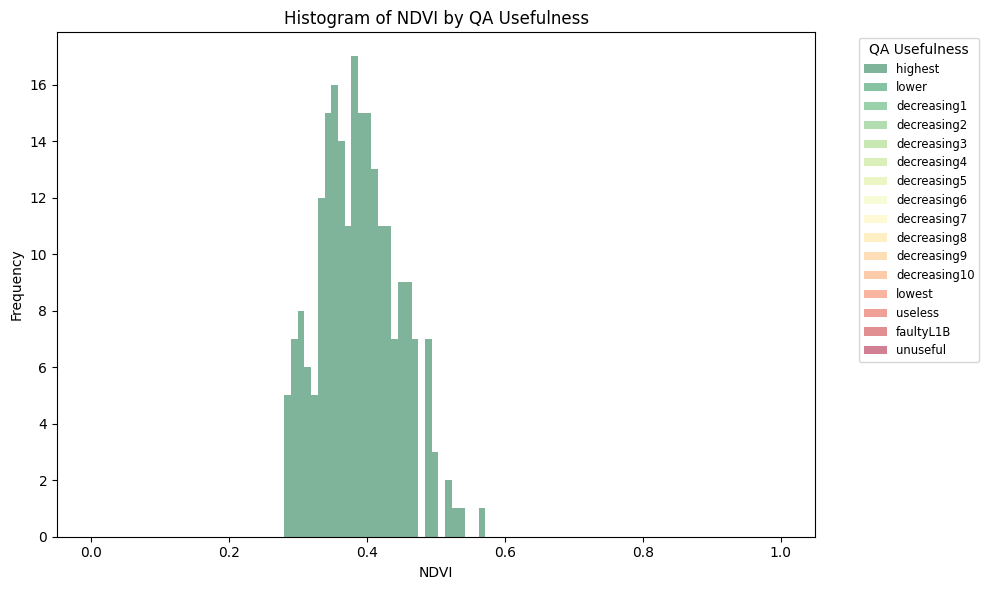

In [153]:
df_all_data_ts = pd.read_csv('../ndvi_data/new_columns_data/2012-04-06.csv')

qa_values = ['highest', 'lower', 'decreasing1', 'decreasing2', 'decreasing3', 
             'decreasing4', 'decreasing5', 'decreasing6', 'decreasing7', 
             'decreasing8', 'decreasing9', 'decreasing10', 'lowest', 
             'useless', 'faultyL1B', 'unuseful']

# Use the 'RdYlGn' colormap to generate colors, reversed for a transition from green to red
colors = plt.cm.RdYlGn_r(np.linspace(0, 1, len(qa_values)))

# Create the plot
plt.figure(figsize=(10, 6))

# Loop through each QA_usefulness value and plot the histogram with different colors
for qa_value, color in zip(qa_values, colors):
    subset = df_all_data_ts[df_all_data_ts.QA_usefulness == qa_value]
    plt.hist(subset.NDVI, bins=30, alpha=0.5, label=qa_value, color=color)

# Add legend, labels, and title
plt.legend(title='QA Usefulness', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.title('Histogram of NDVI by QA Usefulness')
plt.tight_layout()

# Show the plot
plt.show()

In [141]:
df_all_data_ts[df_all_data_ts.NDVI > 0.7]

,system:index,NDVI,longitude,latitud,QA_general,QA_usefulness,QA_aerosol,QA_adjacent_cloud,QA_water
3,3,0.7095,-36.526966,-6.851886,goodQA,lower,low,yes,land
7,7,0.7213,-36.490735,-6.851886,regularQA,decreasing1,intermediate,yes,land
9,9,0.7178,-36.472619,-6.851886,regularQA,decreasing3,intermediate,yes,land
62,62,0.7027,-36.502554,-6.887859,goodQA,highest,low,no,land
63,63,0.7369,-36.493495,-6.887859,goodQA,highest,low,no,land
82,82,0.7146,-36.448894,-6.896852,goodQA,highest,low,no,land
83,83,0.7104,-36.439835,-6.896852,goodQA,highest,low,no,land
96,96,0.7290,-36.449586,-6.905845,goodQA,highest,low,no,land
122,122,0.7627,-36.478152,-6.923832,regularQA,decreasing2,intermediate,yes,land
137,137,0.7360,-36.478848,-6.932825,regularQA,decreasing2,intermediate,yes,land


In [126]:
intento = df_all_data_ts[df_all_data_ts.QA_usefulness == 'decreasing1']
intento[intento.QA_general != 'goodQA']

,system:index,NDVI,longitude,latitud,QA_general,QA_usefulness,QA_aerosol,QA_adjacent_cloud,QA_water
16,16,0.1578,-36.400156,-6.851886,cloudy,decreasing1,correction,no,land
17,17,0.3636,-36.391098,-6.851886,regularQA,decreasing1,intermediate,yes,land
68,68,0.4411,-36.448202,-6.887859,regularQA,decreasing1,intermediate,yes,land
69,69,0.4192,-36.439144,-6.887859,regularQA,decreasing1,intermediate,yes,land
75,75,0.2665,-36.384792,-6.887859,cloudy,decreasing1,correction,no,land
82,82,0.3374,-36.448894,-6.896852,cloudy,decreasing1,correction,no,land
83,83,0.3761,-36.439835,-6.896852,cloudy,decreasing1,correction,no,land
88,88,0.3366,-36.394541,-6.896852,regularQA,decreasing1,intermediate,yes,land
89,89,0.3216,-36.385483,-6.896852,regularQA,decreasing1,intermediate,yes,land
102,102,0.3573,-36.395233,-6.905845,regularQA,decreasing1,intermediate,no,land


In [155]:
date_NDVI = []
average_NDVI = []
for file in os.listdir('../ndvi_data/new_columns_data/'):
    df_modified = pd.read_csv('../ndvi_data/new_columns_data/'+file)
    date_NDVI.append(pd.to_datetime(file[:-4], format= "%Y-%m-%d"))
    average_NDVI.append(df_modified.NDVI.mean())
pd.DataFrame({'date':date_NDVI, 'NDVI': average_NDVI}).to_csv('average_ndvi.csv')

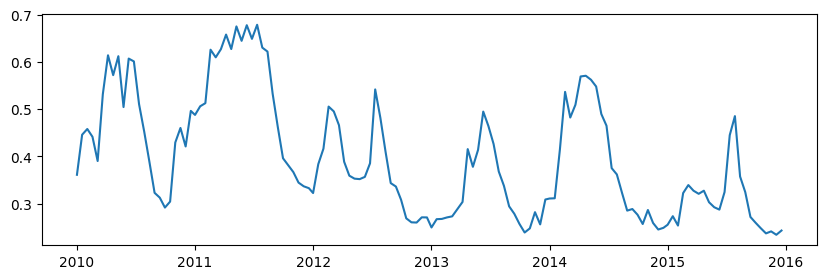

In [115]:
plt.figure(figsize=(10,3))
plt.plot(date_NDVI, average_NDVI)
plt.show() 